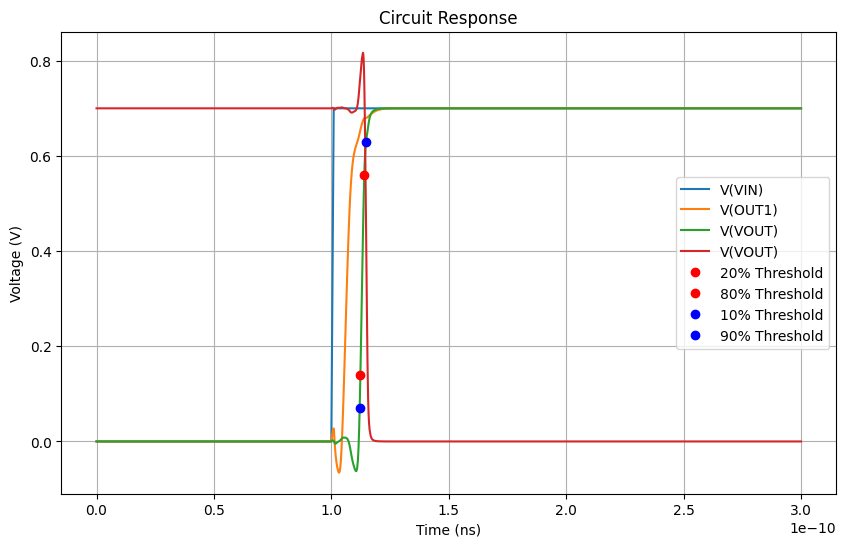

Time at 20% threshold: 1.1236e-10 s
Time at 80% threshold: 1.1402e-10 s
Rise time (80% - 20%): 1.6605e-12 s , 1.6605e+00 ps
Time at 10% threshold: 1.1206e-10 s
Time at 90% threshold: 1.1479e-10 s
Rise time (90% - 10%): 2.7297e-12 s , 2.7297e+00 ps


In [13]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
# Load data from the Xyce output file
data = []

with open("netlist.sp.prn", "r") as f:
    # Skip the header line
    header = f.readline()
    
    # Read the rest of the lines as data
    for line in f:
        # Split line into elements and convert to floats
        elements = line.split()
        try:
            # Convert all elements to float except the first column which is index
            data.append([float(el) for el in elements[1:]])
        except ValueError:
            continue  # Skip any line that can't be converted

# Transpose the data to plot
vdd = 0.7
data = list(zip(*data))
time = np.array(data[0])
Vout = np.array(data[3])
v20 = 0.2 * vdd
v80 = 0.8 * vdd
v10 = 0.1 * vdd
v90 = 0.9 * vdd

f_interp = interp1d(Vout, time, kind='linear', fill_value='extrapolate')

t20 = f_interp(v20)
t80 = f_interp(v80)
t10 = f_interp(v10)
t90 = f_interp(v90)


dt = t80 - t20
dt_ = t90 - t10
# Plot the waveform
plt.figure(figsize=(10,6))
plt.plot(data[0], data[1], label='V(VIN)')
plt.plot(data[0], data[2], label='V(OUT1)')
plt.plot(data[0], data[3], label='V(VOUT)')
plt.plot(data[0], data[4], label='V(VOUT)')

plt.plot(t20, v20, 'ro', label='20% Threshold')
plt.plot(t80, v80, 'ro', label='80% Threshold')
plt.plot(t10, v10, 'bo', label='10% Threshold')
plt.plot(t90, v90, 'bo', label='90% Threshold')

plt.title("Circuit Response")
plt.xlabel("Time (ns)")
plt.ylabel("Voltage (V)")
plt.grid(True)
plt.legend()
plt.show()
print(f"Time at 20% threshold: {t20:.4e} s")
print(f"Time at 80% threshold: {t80:.4e} s")
print(f"Rise time (80% - 20%): {dt:.4e} s , {dt*1e12:.4e} ps")
print(f"Time at 10% threshold: {t10:.4e} s")
print(f"Time at 90% threshold: {t90:.4e} s")
print(f"Rise time (90% - 10%): {dt_:.4e} s , {dt_*1e12:.4e} ps")
